# The Sparks Foundation

# Task-2 Predictions using unsupervised learning

Problem Statement:From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

# Steps:

1. Importing Dataset

2. Visualizing The Data

3. Finding The optimum no. of Clusters

4. Applying K-Means Clustering on the Data

5. Visualizing the Clusters

# Step:1 Importing Dataset

In [1]:
# importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
import warnings as wg
wg.filterwarnings("ignore")

In [2]:
#Reading Iris Dataset
Data=pd.read_csv("Iris.csv")
Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Step-3: Visualizing The Data

In [3]:
Data.tail()#to check last five values of data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
Data.shape#to check matrix size

(150, 6)

In [5]:
Data.columns#to check column heading

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
Data['Species'].unique()#to check species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
Data.describe()#to find mathemaical information on data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Now we will drop the label column because it is an unsuperviosed learning problem.

In [12]:
 iris=pd.DataFrame(Data)
iris_Data=iris.drop(columns=['Species','Id'])
iris_Data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Step-3: Finding the optimum no. of clusters

Before clustering the data using kmeans,we need to specify the no. of clusters.in order to find the no. of clusters, there are various methods available like silhouette coeff. and elbow method. here we have used elbow method.

### Elbow Method:

In this method the no. of clusters are varies within a certain range.for each no. within cluster sum of square(wcss) value is calculated and stored in a list. these values are then plotted against the range of no. of clusters used before the location of bend in the 2nd plot indicates the appropriate no. of clusters.

In [17]:
#caluculating the Within Clusters Sum of Square
within_cluster_sum_of_square=[]

clusters_range=range(1,15)
for k in clusters_range:
    km=KMeans(n_clusters=k)
    km=km.fit(iris_Data)
    within_cluster_sum_of_square.append(km.inertia_)

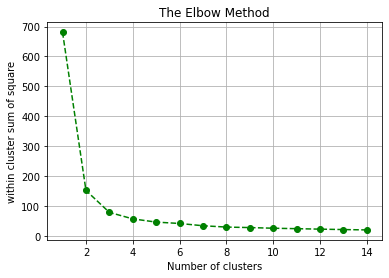

In [18]:
#plotting the "within cluster sum of square" against cluster range
plt.plot(clusters_range,within_cluster_sum_of_square,'go--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('within cluster sum of square')
plt.grid()
plt.show()

We can clearly see why it is called 'The Elboe method'.from the above graph the optimum clusters is where the elbow occurs.This is when the WCSS does not decrease significantly with every iteration.
from this we choose no. of cluster as "3".

# Step-4: Applying Kmeans Clustering on the data

In [21]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
predictions=model.fit_predict(iris_Data)

# Step-5: Visualizing the clusters

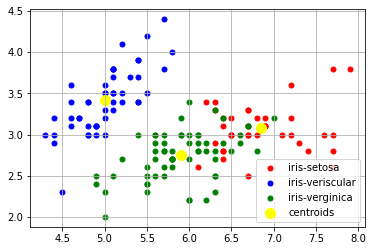

In [29]:
x=iris_Data.iloc[:,[0,1,2,3]].values
plt.scatter(x[predictions==0,0],x[predictions==0,1],s=25,c='red',label='iris-setosa')
plt.scatter(x[predictions==1,0],x[predictions==1,1],s=25,c='blue',label='iris-veriscular')
plt.scatter(x[predictions==2,0],x[predictions==2,1],s=25,c='green',label='iris-verginica')
#plotting the cluster centers
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=100,c='yellow',label='centroids')
plt.legend()
plt.grid()
plt.show()
